In [ ]:
#--------------------------------
#Requried imports for the package
#--------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import timeit
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from subprocess import call
from IPython.display import Image
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,jaccard_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#--------------------------------
#Load the dataset 'final.csv'
#--------------------------------

#l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
data = pd.read_csv('final.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20536 entries, Unnamed: 0 to Class
dtypes: float64(20531), int64(2), object(3)
memory usage: 125.5+ MB


In [ ]:
data.dtypes

Unnamed: 0          int64
Unnamed: 0.1        int64
Unnamed: 0.1.1     object
gene_0            float64
gene_1            float64
                   ...   
gene_20528        float64
gene_20529        float64
gene_20530        float64
Unnamed: 0.2       object
Class              object
Length: 20536, dtype: object

In [ ]:
data.shape

(801, 20536)

In [ ]:
data['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [ ]:
data.head()

Unnamed: 0  Unnamed: 0.1 Unnamed: 0.1.1  gene_0    gene_1    gene_2  \
0           0             0       sample_0     0.0  2.017209  3.265527   
1           1             1       sample_1     0.0  0.592732  1.588421   
2           2             2       sample_2     0.0  3.511759  4.327199   
3           3             3       sample_3     0.0  3.663618  4.507649   
4           4             4       sample_4     0.0  2.655741  2.821547   

     gene_3     gene_4  gene_5    gene_6  ...  gene_20523  gene_20524  \
0  5.478487  10.431999     0.0  7.175175  ...    9.723516    7.220030   
1  7.586157   9.623011     0.0  6.816049  ...    9.740931    6.256586   
2  6.881787   9.870730     0.0  6.972130  ...   10.908640    5.401607   
3  6.659068  10.196184     0.0  7.843375  ...   10.141520    8.942805   
4  6.539454   9.738265     0.0  6.566967  ...   10.373790    7.181162   

   gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0    9.119813   12.003135    9.650743    8.921326    5.286759         0.0   
1    8.381612   12.674552   10.517059    9.397854    2.094168         0.0   
2    9.911597    9.045255    9.788359   10.090470    1.683023         0.0   
3    9.601208   11.392682    9.694814    9.684365    3.292001         0.0   
4    9.846910   11.922439    9.217749    9.461191    5.110372         0.0   

   Unnamed: 0.2  Class  
0      sample_0   PRAD  
1      sample_1   LUAD  
2      sample_2   PRAD  
3      sample_3   PRAD  
4      sample_4   BRCA  

[5 rows x 20536 columns]

In [ ]:
data=data.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2','Unnamed: 0.1.1'],axis=1)

In [ ]:
#data.to_csv('final.csv',index=false)

In [ ]:
data.describe()

In [ ]:
#-----------------------------------
#Generating the Panda profile report
#-----------------------------------
profile = ProfileReport(data,minimal=True)
profile

In [ ]:
# CNN, LGBM, k-Nearest Neighbors, Naive Bayes

In [ ]:
data

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0    0.591871     0.0     0.0  ...    8.210257    9.723516    7.220030   
1    0.000000     0.0     0.0  ...    7.323865    9.740931    6.256586   
2    0.452595     0.0     0.0  ...    8.127123   10.908640    5.401607   
3    0.434882     0.0     0.0  ...    8.792959   10.141520    8.942805   
4    0.360982     0.0     0.0  ...    8.891425   10.373790    7.181162   
..        ...     ...     ...  ...         ...         ...         ...   
796  0.496922     0.0     0.0  ...    9.118313   10.004852    4.484415   
797  0.000000     0.0     0.0  ...    9.623335    9.823921    6.555327   
798  1.811101     0.0     0.0  ...    8.610704   10.485517    3.589763   
799  0.000000     0.0     0.0  ...    8.605387   11.004677    4.745888   
800  0.000000     0.0     0.0  ...    8.594354   10.243079    9.139459   

     gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  gene_20530  \
0      9.119813   12.003135    9.650743    8.921326    5.286759    0.000000   
1      8.381612   12.674552   10.517059    9.397854    2.094168    0.000000   
2      9.911597    9.045255    9.788359   10.090470    1.683023    0.000000   
3      9.601208   11.392682    9.694814    9.684365    3.292001    0.000000   
4      9.846910   11.922439    9.217749    9.461191    5.110372    0.000000   
..          ...         ...         ...         ...         ...         ...   
796    9.614701   12.031267    9.813063   10.092770    8.819269    0.000000   
797    9.064002   11.633422   10.317266    8.745983    9.659081    0.000000   
798    9.350636   12.180944   10.681194    9.466711    4.677458    0.586693   
799    9.626383   11.198279   10.335513   10.400581    5.718751    0.000000   
800   10.102934   11.641081   10.607358    9.844794    4.550716    0.000000   

     Class  
0     PRAD  
1     LUAD  
2     PRAD  
3     PRAD  
4     BRCA  
..     ...  
796   BRCA  
797   LUAD  
798   COAD  
799   PRAD  
800   PRAD  

[801 rows x 20532 columns]

In [ ]:
#--------------------------------------------
#Splitting the data into features and classes
#--------------------------------------------
y=data['Class']
x=data.iloc[:,0:20531]

In [ ]:
y

0      PRAD
1      LUAD
2      PRAD
3      PRAD
4      BRCA
       ... 
796    BRCA
797    LUAD
798    COAD
799    PRAD
800    PRAD
Name: Class, Length: 801, dtype: object

In [ ]:
x

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
0    0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
1    0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
2    0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
3    0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
4    0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   
..        ...     ...     ...  ...         ...         ...         ...   
796  0.496922     0.0     0.0  ...    6.088133    9.118313   10.004852   
797  0.000000     0.0     0.0  ...    6.371876    9.623335    9.823921   
798  1.811101     0.0     0.0  ...    5.719386    8.610704   10.485517   
799  0.000000     0.0     0.0  ...    5.785237    8.605387   11.004677   
800  0.000000     0.0     0.0  ...    6.403075    8.594354   10.243079   

     gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  gene_20529  \
0      7.220030    9.119813   12.003135    9.650743    8.921326    5.286759   
1      6.256586    8.381612   12.674552   10.517059    9.397854    2.094168   
2      5.401607    9.911597    9.045255    9.788359   10.090470    1.683023   
3      8.942805    9.601208   11.392682    9.694814    9.684365    3.292001   
4      7.181162    9.846910   11.922439    9.217749    9.461191    5.110372   
..          ...         ...         ...         ...         ...         ...   
796    4.484415    9.614701   12.031267    9.813063   10.092770    8.819269   
797    6.555327    9.064002   11.633422   10.317266    8.745983    9.659081   
798    3.589763    9.350636   12.180944   10.681194    9.466711    4.677458   
799    4.745888    9.626383   11.198279   10.335513   10.400581    5.718751   
800    9.139459   10.102934   11.641081   10.607358    9.844794    4.550716   

     gene_20530  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
..          ...  
796    0.000000  
797    0.000000  
798    0.586693  
799    0.000000  
800    0.000000  

[801 rows x 20531 columns]

In [ ]:
# labels = {
#     str(i): f"PC {i+1} ({var:.1f}%)"
#     for i, var in enumerate(pca.explained_variance_ratio_ * 100)
# }
labels = {str(i): f"PC {i+1}" for i in range(203)}
labels['color'] = 'Class'

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100
total_var

85.0558040576752

In [ ]:
#---------------------------------------------------
#Plotting the chart for the new principle components.
#---------------------------------------------------
fig = px.scatter_matrix(
    components,
    labels=labels,
    color=y,
    dimensions=range(10),
    title=f'Total Explained Variance: {total_var:.2f}%'
)
fig.update_traces(diagonal_visible=False)
fig.show()




---



# PCA

In [ ]:
#----------------
#Scaling the data
#----------------
scaler = StandardScaler()

In [ ]:
#-----------------
#Encoding the data
#-----------------
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y[798]

1

In [ ]:
#-----------------
#Fitting the data
#-----------------
scaler.fit(x)

StandardScaler()

In [ ]:
x=scaler.transform(x)

In [ ]:
x

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [ ]:
X, x_test, Y, y_test = train_test_split(x, y, test_size=0.15,random_state=10)

In [ ]:
pca=PCA(.85)

In [ ]:
pca.fit(X)

PCA(n_components=0.85)

In [ ]:
#-----------------------------------------
#Transform the data for test and train set
#-----------------------------------------e
test_data=pca.transform(x_test)
train_data=pca.transform(X)

In [ ]:
pca.n_components_

232

In [ ]:
dfa=pd.DataFrame(x)

In [ ]:
#--------------------------------
#Extracting the required features
#--------------------------------
features = dfa.columns

In [ ]:
fig = px.scatter_matrix(
    dfa,
    dimensions=features
)
fig.update_traces(diagonal_visible=False)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/express/_core.py:1222: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_output[col_name] = to_unindexed_series(df_input[argument])


In [ ]:
fig.show()

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    x,
    labels=labels,
    dimensions=range(4)
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1,random_state=10)

In [ ]:
profile = ProfileReport(pca_data,minimal=True)

In [ ]:
# from sklearn.model_selection import KFold
# kfold = KFold(2)
# for train, test in kfold.split(X):
#   print(test)
#   # pca.fit(train)
#   # pca.transform(test)
#   # pca.transform(test)



---



# Random Forest

In [ ]:
#--------------------------------
#Training the Random forest model
#--------------------------------
rf_clf=RandomForestClassifier(n_estimators=100)

%timeit rf_clf.fit(train_data,Y)



1 loop, best of 5: 636 ms per loop


In [ ]:
estimator = rf_clf.estimators_[69]

In [ ]:
dfaaa=pd.DataFrame(X)

In [ ]:
export_graphviz(estimator, 
                out_file='tree.dot')

In [ ]:

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [ ]:
#--------------------------------
#Display the random forest tree
#--------------------------------
Image(filename = 'tree.png')

In [ ]:
y_pred=rf_clf.predict(test_data)

In [ ]:
#--------------------------------
#Printing the accuracy
#--------------------------------
%timeit print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

In [ ]:
imps= rf_clf.feature_importances_

In [ ]:

#--------------------------------
# Creating a two-dimensional, size-mutable, potentially heterogeneous tabular data.
#--------------------------------

final_df = pd.DataFrame({"Features": pd.DataFrame(X).columns, "Importances": imps})

In [ ]:

#----------------------------------------------
# Feature importances as given by random forest
#----------------------------------------------
final_df.set_index('Importances')

Features
Importances          
0.079576            0
0.061011            1
0.109327            2
0.065687            3
0.058137            4
...               ...
0.001712          257
0.001057          258
0.001346          259
0.002284          260
0.001948          261

[262 rows x 1 columns]

In [ ]:
#----------------------------------------------
# Sorting the values along the default axis
#----------------------------------------------
final_df = final_df.sort_values('Importances')

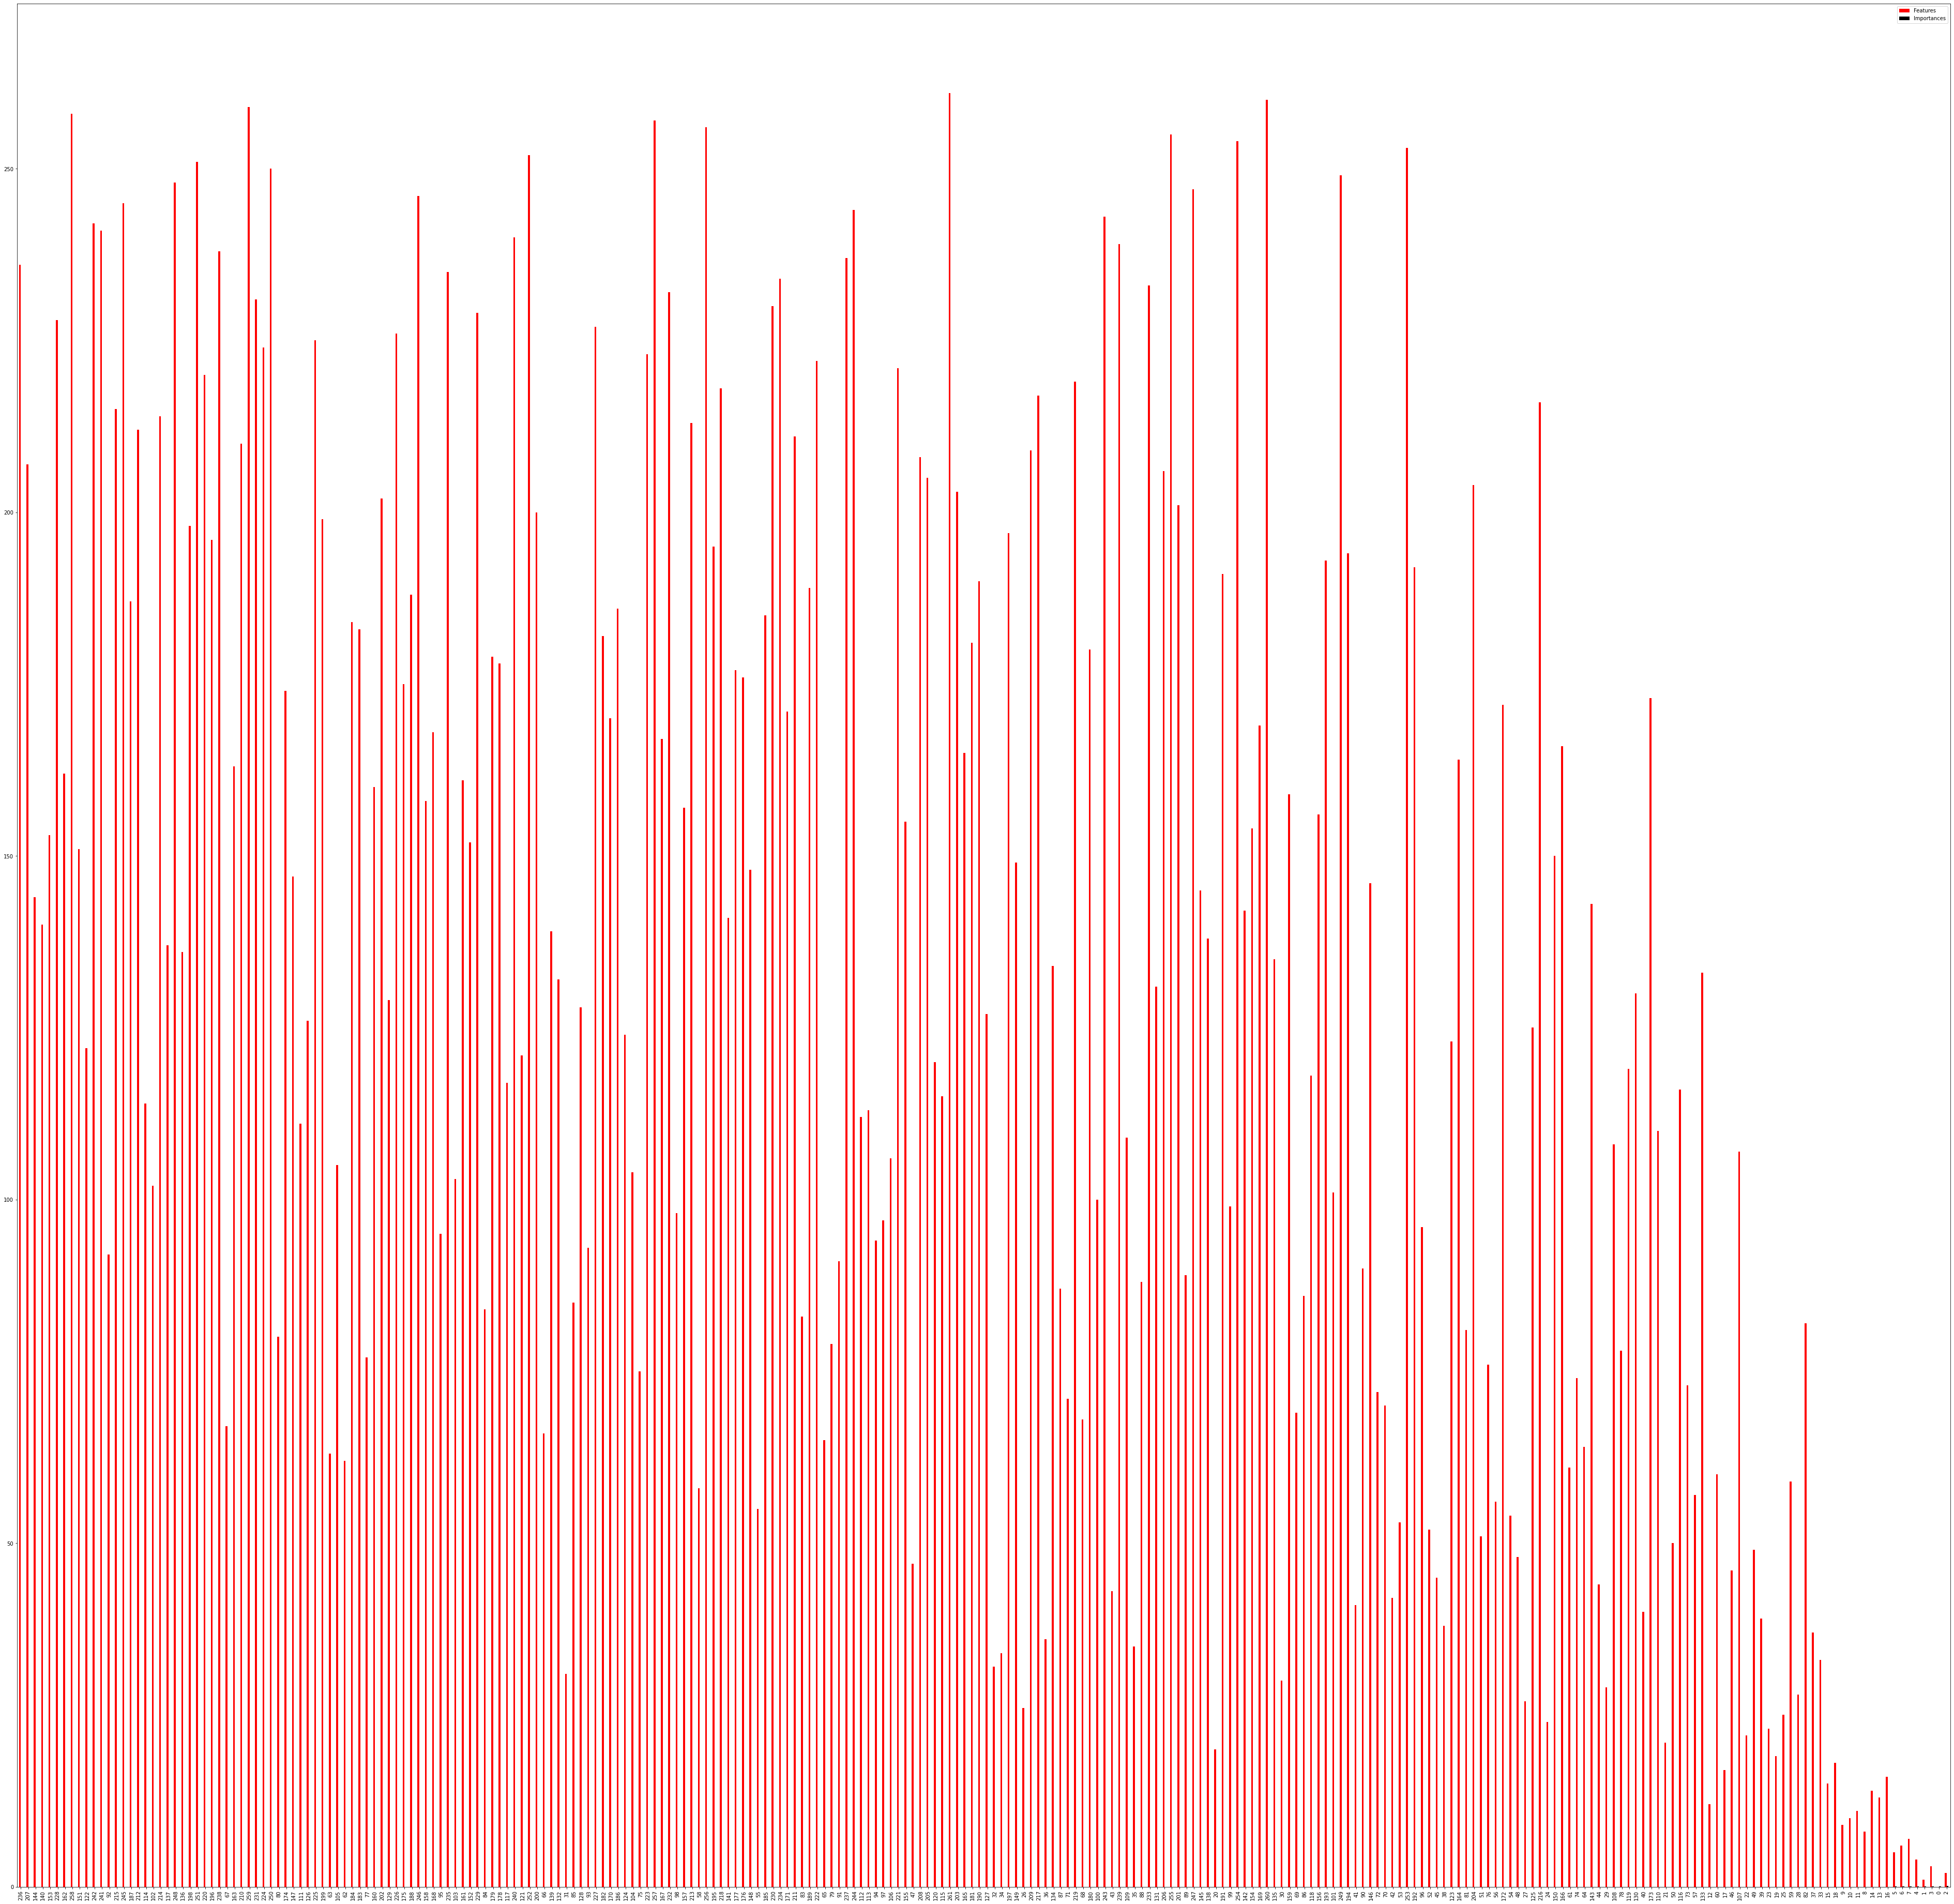

In [ ]:
c = ['red', 'black']
final_df.plot.bar(color = c , figsize=(67, 67))

In [ ]:
cv=pd.DataFrame(X).columns

In [ ]:
#---------------------------------------------------------------
#transformer for selecting features based on importance weights.
#---------------------------------------------------------------
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, Y)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
sel.get_support()


In [ ]:
aaa=pd.DataFrame(y_pred)

In [ ]:
selected_feat= aaa.columns[(sel.get_support())]
len(selected_feat)

21

In [ ]:
print(selected_feat)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            23, 25],
           dtype='int64')


In [ ]:
# pd.series(sel.estimator_,feature_importances_,.ravel()).hist()


In [ ]:
#-------------------------------------------------------------
#confusion matrix to evaluate the accuracy of a classification.
#-------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)
report=classification_report(y_pred,y_test)

In [ ]:
cm

array([[50,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 23,  0,  0],
       [ 1,  0,  0, 21,  0],
       [ 0,  0,  0,  0, 17]])

In [ ]:
aaa.value_counts()

In [ ]:
import seaborn as sns

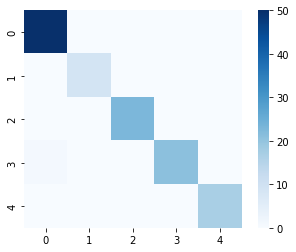

In [ ]:
#----------------------------------------------
#  Plotting the data as a color-encoded matrix.
#----------------------------------------------
sns.heatmap(cm,square=True, cmap='Blues')

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.98      0.99        51\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        23\n           3       0.95      1.00      0.98        21\n           4       1.00      1.00      1.00        17\n\n    accuracy                           0.99       121\n   macro avg       0.99      1.00      0.99       121\nweighted avg       0.99      0.99      0.99       121\n'

In [ ]:
#----------------------------------------
#  Creating a multilabel_confusion_matrix
#----------------------------------------
metrics.multilabel_confusion_matrix(y_test, y_pred)

array([[[ 70,   1],
        [  0,  50]],

       [[112,   0],
        [  0,   9]],

       [[ 98,   0],
        [  0,  23]],

       [[ 99,   0],
        [  1,  21]],

       [[104,   0],
        [  0,  17]]])

In [ ]:
y_pred

array([0, 3, 2, 0, 0, 2, 3, 2, 2, 1, 0, 0, 2, 3, 0, 0, 1, 2, 2, 2, 2, 0,
       2, 0, 2, 3, 3, 0, 0, 0, 0, 3, 2, 4, 2, 3, 3, 0, 0, 3, 4, 1, 4, 0,
       3, 0, 0, 4, 0, 3, 3, 0, 0, 4, 4, 0, 4, 0, 4, 2, 2, 3, 4, 4, 0, 0,
       4, 2, 2, 0, 3, 0, 2, 0, 0, 1, 4, 0, 0, 0, 4, 1, 1, 4, 0, 0, 0, 2,
       0, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 4, 0, 0, 1, 1, 0, 3, 0, 0,
       0, 2, 3, 2, 4, 2, 4, 0, 3, 3, 0])

In [ ]:
#----------------------------------------------
#  Computing the recall score.
#----------------------------------------------
metrics.recall_score(y_test,y_pred,average=None)

array([1.        , 1.        , 1.        , 0.95454545, 1.        ])

In [ ]:
#--------------------------------
#  Computing the precision score.
#--------------------------------
metrics.precision_score(y_test,y_pred,average=None)

array([0.98039216, 1.        , 1.        , 1.        , 1.        ])

In [ ]:
#-------------------------
#  Computing the F1 score.
#-------------------------
metrics.f1_score(y_test,y_pred,average=None)

array([0.99009901, 1.        , 1.        , 0.97674419, 1.        ])

In [ ]:
#----------------------------------------------
#  Computing the jaccard similarity coefficient score.
#----------------------------------------------
metrics.jaccard_score(y_test, y_pred, average=None)

array([0.98039216, 1.        , 1.        , 0.95454545, 1.        ])

In [ ]:
#----------------------------------------------
# Predicting the conditional probability
#----------------------------------------------
y_pred_proba=rf_clf.predict_proba(x_test)

In [ ]:
y_pred_proba

In [ ]:
#----------------------------------------------
#  Computing the ROC AUC score.
#----------------------------------------------
macro_roc_auc_ovo = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted")
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.999583 (macro),
0.999435 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999319 (macro),
0.999283 (weighted by prevalence)


In [ ]:
n_classes=5

In [ ]:
n_samples, n_features = train_data.shape


In [ ]:
y_score = rf_clf.predict_proba(test_data)

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[i], y_score[i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(5)):
    rf_clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])




---



# Naive Bayes

In [ ]:
#---------------------------------------
#  Initializing the Gaussian Naive Bayes
#---------------------------------------
gnb_model = GaussianNB()
gnb_model.fit(X, Y)

GaussianNB()

In [ ]:
#---------------------------------------
# Predicting the values using test data
#---------------------------------------
y_pred=gnb_model.predict(x_test)
y_pred

array([4, 3, 2, 0, 0, 2, 3, 0, 2, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 3, 0, 0, 2, 0, 0, 3, 2, 2, 2, 3, 3, 0, 0, 3, 4, 0, 4, 0,
       0, 0, 0, 4, 0, 3, 3, 3, 4, 4, 4, 0, 0, 0, 4, 2, 3, 0, 0, 0, 0, 0,
       4, 3, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 3, 2, 4, 3, 3, 4, 2, 0, 0, 2,
       0, 3, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 3, 2, 3, 2, 0,
       0, 2, 3, 2, 4, 0, 0, 0, 3, 2, 0])

In [ ]:
#--------------------------
# Print the accuracy score
#--------------------------
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 69.42148760330579 %


In [ ]:
#---------------------------------------
# Creating the confusion matrix
#---------------------------------------
cm = confusion_matrix(y_test, y_pred)
report=classification_report(y_pred,y_test)

In [ ]:
cm

array([[37,  0,  9,  2,  2],
       [ 2,  1,  3,  3,  0],
       [ 2,  0, 19,  2,  0],
       [ 4,  0,  1, 17,  0],
       [ 4,  0,  3,  0, 10]])

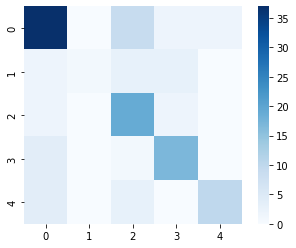

In [ ]:
#---------------------------------------
# Generating the heatmap based on the generated data
#---------------------------------------
sns.heatmap(cm,square=True, cmap='Blues')

In [ ]:
#---------------------------------------
# Generating the confusion matrix for each class or sample.
#---------------------------------------
metrics.multilabel_confusion_matrix(y_test, y_pred)

array([[[ 59,  12],
        [ 13,  37]],

       [[112,   0],
        [  8,   1]],

       [[ 82,  16],
        [  4,  19]],

       [[ 92,   7],
        [  5,  17]],

       [[102,   2],
        [  7,  10]]])

In [ ]:
#---------------------------------------
# Generating the recall score
#---------------------------------------
metrics.recall_score(y_test,y_pred,average=None)

array([0.74      , 0.11111111, 0.82608696, 0.77272727, 0.58823529])

In [ ]:
#---------------------------------------
# Generating the precision score
#---------------------------------------
metrics.precision_score(y_test,y_pred,average=None)

array([0.75510204, 1.        , 0.54285714, 0.70833333, 0.83333333])

In [ ]:
#---------------------------------------
# Generating the jaccard similarity coefficient score
#---------------------------------------
metrics.jaccard_score(y_test,y_pred,average=None)

array([0.59677419, 0.11111111, 0.48717949, 0.5862069 , 0.52631579])

In [ ]:
#---------------------------------------
# Generating the f1 score
#---------------------------------------
metrics.f1_score(y_test,y_pred,average=None)

array([0.74747475, 0.2       , 0.65517241, 0.73913043, 0.68965517])

In [ ]:
y_pred_proba=gnb_model.predict_proba(x_test)

In [ ]:
#---------------------------------------
# Creating the ROC AUC
#---------------------------------------
macro_roc_auc_ovo = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = metrics.roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted")
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.754770 (macro),
0.767864 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.761594 (macro),
0.788891 (weighted by prevalence)


In [ ]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=2, random_state=99)

In [ ]:
#---------------------------------------
# Hyper parameter tuning
#---------------------------------------
params_NB = {'var_smoothing':np.logspace(0,-9, num=50)}

gs_NB = GridSearchCV(estimator=gnb_model, param_grid=params_NB, cv=cv_method,verbose=1,scoring='accuracy')
Data_transformed = PowerTransformer().fit_transform(test_data)
gs_NB.fit(Data_transformed, y_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=99),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2....
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])


In [ ]:
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.9917355371900827


In [ ]:
#---------------------------------------
# Generating the precision score
#---------------------------------------
metrics.precision_score(y_test,predict_test,average=None)

array([1.        , 1.        , 1.        , 1.        , 0.94444444])



---



In [ ]:
#---------------------------------------
# Generating the f1 score
#---------------------------------------
metrics.f1_score(y_test,predict_test,average=None)

array([0.98989899, 1.        , 1.        , 1.        , 0.97142857])

# ANN

In [ ]:
#---------------------------------------
#  Required imports for ANN
#---------------------------------------
import tensorflow as tf
import os
from tensorflow import keras
from keras import Sequential
from keras.metrics import Precision,Recall
from keras.layers import (Conv2D,Flatten,Dense,Dropout,
BatchNormalization,ZeroPadding2D,MaxPooling2D,GlobalAveragePooling2D,Activation,LeakyReLU)
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
#---------------------------------------
#  Initializing the ANN
#---------------------------------------
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(train_data.shape[1], )), #Input Layer
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(Y)), activation='softmax') #Output layer
])

In [ ]:
#---------------------------------------
# Reduce learning rate when a metric has stopped improving.
#---------------------------------------
reduce_lr = ReduceLROnPlateau(monitor='loss',
                              patience=3,
                              factor = 0.3,
                             min_lr=0.0001)


In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

In [ ]:
#---------------------------------------
#  Fitting the data with 10 Epochs
#---------------------------------------
model.fit(train_data, Y, epochs =10,batch_size=8,shuffle=True,callbacks=[reduce_lr])

Epoch 1/10
85/85 [==============================] - 1s 2ms/step - loss: 0.1837 - sparse_categorical_accuracy: 0.9441 - lr: 0.0010
Epoch 2/10
85/85 [==============================] - 0s 2ms/step - loss: 0.1124 - sparse_categorical_accuracy: 0.9691 - lr: 0.0010
Epoch 3/10
85/85 [==============================] - 0s 2ms/step - loss: 0.1290 - sparse_categorical_accuracy: 0.9662 - lr: 0.0010
Epoch 4/10
85/85 [==============================] - 0s 2ms/step - loss: 0.1008 - sparse_categorical_accuracy: 0.9750 - lr: 0.0010
Epoch 5/10
85/85 [==============================] - 0s 2ms/step - loss: 0.1015 - sparse_categorical_accuracy: 0.9632 - lr: 0.0010
Epoch 6/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9735 - lr: 0.0010
Epoch 7/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9706 - lr: 0.0010
Epoch 8/10
85/85 [==============================] - 0s 2ms/step - loss: 0.0520 - sparse_ca

In [ ]:
#---------------------------------------
#  Evaluating the model
#---------------------------------------
test_loss, test_accuracy = model.evaluate(test_data, y_test)

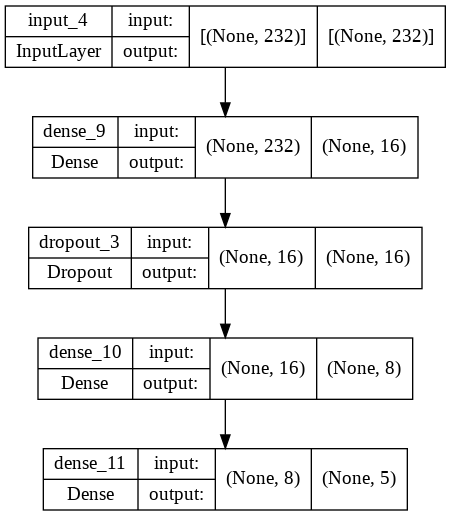

In [ ]:
#---------------------------------------
#  Printing the ANN architecture
#---------------------------------------
dot_img_file = '/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fefa5fb3590>>

In [ ]:
y_pred=model.predict(test_data)



---





---

# SVM

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(train_data,Y)

In [ ]:
poly_pred = poly.predict(test_data)

In [ ]:
accuracy_poly = poly.score(test_data, y_test)
print('Accuracy Polynomial Kernel:', accuracy_poly)

Accuracy Polynomial Kernel: 0.9504132231404959


## LGBM

In [ ]:
import lightgbm as lgb


In [ ]:
lgb_params = {
    'task': 'train',
    'boosting_type': 'goss',
    'objective': 'multiclass',
    'metric':None,
    'metric': {'l2', 'auc'},
    'gpu_use_dp':'True',
    'n_classes_' : 5
    }


In [ ]:
lgb_train = lgb.Dataset(X, label=Y)
lgb_test = lgb.Dataset(x_test,label= y_test)
model = lgb.train(lgb_params,lgb_train,valid_sets= lgb_test)

In [ ]:
# model=lgb.train(X,Y)

In [ ]:
y_pred=model.predict(x_test)
y_pred

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

In [ ]:
cm = confusion_matrix(y_test, y_pred)
report=classification_report(y_pred,y_test)

In [ ]:
cm

array([[50,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 1,  0, 22,  0,  0],
       [ 3,  0,  0, 19,  0],
       [ 0,  0,  0,  0, 17]])

In [ ]:
report

'              precision    recall  f1-score   support\n\n           0       1.00      0.93      0.96        54\n           1       1.00      1.00      1.00         9\n           2       0.96      1.00      0.98        22\n           3       0.86      1.00      0.93        19\n           4       1.00      1.00      1.00        17\n\n    accuracy                           0.97       121\n   macro avg       0.96      0.99      0.97       121\nweighted avg       0.97      0.97      0.97       121\n'



---





---



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=8)

In [ ]:
neigh.fit(X, Y)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
y_pred=neigh.predict(x_test)
y_pred

array([0, 3, 2, 0, 0, 2, 3, 2, 2, 1, 0, 0, 2, 3, 0, 0, 1, 2, 2, 2, 2, 0,
       2, 0, 2, 3, 3, 0, 0, 0, 0, 3, 2, 4, 2, 3, 3, 0, 0, 3, 4, 1, 4, 0,
       3, 0, 0, 4, 0, 3, 3, 0, 0, 4, 4, 0, 4, 0, 4, 2, 2, 3, 4, 4, 0, 0,
       4, 2, 2, 0, 3, 0, 2, 0, 0, 1, 4, 0, 3, 0, 4, 1, 1, 4, 0, 0, 0, 2,
       0, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 4, 0, 0, 1, 1, 0, 3, 0, 0,
       0, 2, 3, 2, 4, 2, 4, 0, 3, 3, 0])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 100.0 %


In [ ]:
cm = confusion_matrix(y_test, y_pred)
report=classification_report(y_pred,y_test)

In [ ]:
cm

array([[50,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0, 23,  0,  0],
       [ 0,  0,  0, 22,  0],
       [ 0,  0,  0,  0, 17]])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
report=classification_report(y_pred,y_test)

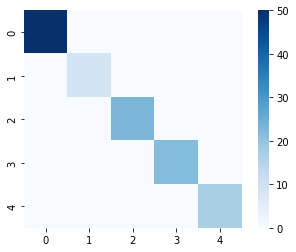

In [ ]:
sns.heatmap(cm,square=True, cmap='Blues')



---





---

# MISC.

In [ ]:
!nvidia-smi

In [ ]:
y_val

In [ ]:
import pynvml

pynvml.nvmlInit()
handle = pynvml.nvmlDeviceGetHandleByIndex(0)
device_name = pynvml.nvmlDeviceGetName(handle)

if device_name != b'Tesla T4':
  raise Exception("""
    Unfortunately this instance does not have a T4 GPU.
    
    Please make sure you've configured Colab to request a GPU instance type.
    
    Sometimes Colab allocates a Tesla K80 instead of a T4. Resetting the instance.

    If you get a K80 GPU, try Runtime -> Reset all runtimes...
  """)
else:
  print('Woo! You got the right kind of GPU!')

In [ ]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local

!conda install -q -y --prefix /usr/local -c conda-forge \
  -c rapidsai-nightly/label/cuda10.0 -c nvidia/label/cuda10.0 \
  cudf cuml

import sys, os, shutil
sys.path.append('/usr/local/lib/python3.6/site-packages/')
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'

for fn in ['libcudf.so', 'librmm.so']:
  shutil.copy('/usr/local/lib/'+fn, os.getcwd())

In [ ]:
# pip install condacolab
!pip install cudf

In [ ]:
condacolab.install()
import nvstrings, nvcategory, cudf
import cuml